# Exercise 5: Time-delay Embedding (Task 4: Part 2 (Lorenz))

In [267]:
# All imports
import matplotlib.pyplot as plt
import numpy as np
from utils import *
from scipy.integrate import solve_ivp

%reload_ext autoreload
%autoreload 2
# TODO: Import necessary python files to simulate the lorenz attractor from the previous exercise

### TODO: Generate data for Lorenz attractor (using prev exercise)

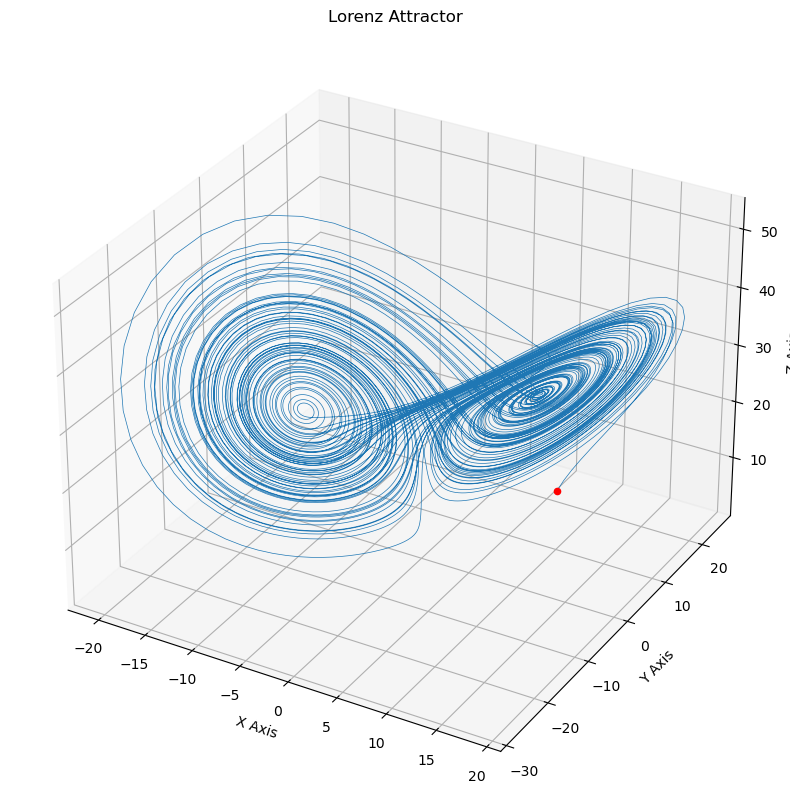

In [269]:
# TODO: Generate lorenz_dataectory data by simulating the Lorenz attractor
# TODO: Visualize lorenz attractor
# Define Lorenz system
def lorenz (t, state , sigma , beta , rho ):
    x, y, z = state
    dx = sigma * (y - x)
    dy = x * ( rho - z) - y
    dz = x * y - beta * z
    return [dx , dy , dz]

 # Parameters and initial state
sigma , beta , rho = 10, 8/3 , 28
initial_state = [10 , 10, 10]

 # Solve ODE
sol = solve_ivp(lorenz , [0, 1000] , initial_state , args =( sigma , beta , rho ), t_eval =np.
linspace (0, 1000 , 10000) )

# implementation on matplotlib page
def lorenz_(xyz, *, s=10, r=28, b=2.667):
    """
    Parameters
    ----------
    xyz : array-like, shape (3,)
       Point of interest in three-dimensional space.
    s, r, b : float
       Parameters defining the Lorenz attractor.

    Returns
    -------
    xyz_dot : array, shape (3,)
       Values of the Lorenz attractor's partial derivatives at *xyz*.
    """
    x, y, z = xyz
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return np.array([x_dot, y_dot, z_dot])


dt = 0.01
num_steps = 10000

xyzs = np.empty((num_steps + 1, 3))  # Need one more for the initial values
xyzs[0] = (10, 10, 10)  # Set initial values
# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    xyzs[i + 1] = xyzs[i] + lorenz_(xyzs[i]) * dt

 # Plot trajectory
fig = plt.figure('Lorenz attractors', (10,10))

# Plot
ax_2 = fig.add_subplot(projection='3d')
ax_2.scatter(10,10,10, color='r')
ax_2.plot(*xyzs.T,lw=0.5)
ax_2.set_xlabel("X Axis")
ax_2.set_ylabel("Y Axis")
ax_2.set_zlabel("Z Axis")
ax_2.set_title("Lorenz Attractor")

plt.savefig('../../plot/Lorenz_Attractor.png')
plt.show()

### TODO: Create and visualize time-delayed x coordinates from Lorenz data in a 3-d Euclidean space


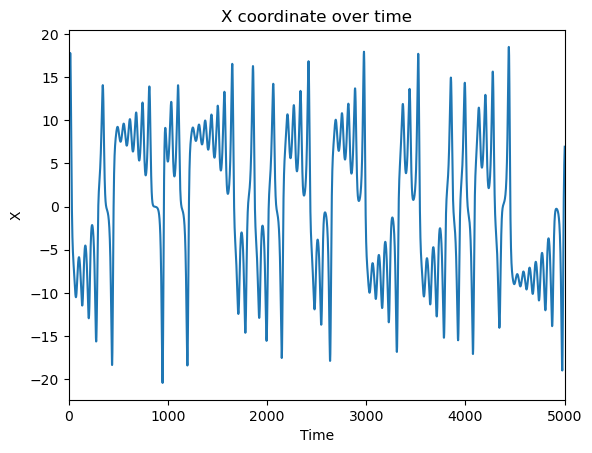

In [279]:
x = xyzs[:,0]
time = np.arange(len(x))
plt.plot(time,x)
plt.xlabel("Time")
plt.ylabel("X")
plt.title("X coordinate over time")
plt.xlim(0,5000)
plt.savefig("../../plot/X_time_Lorenz.png")

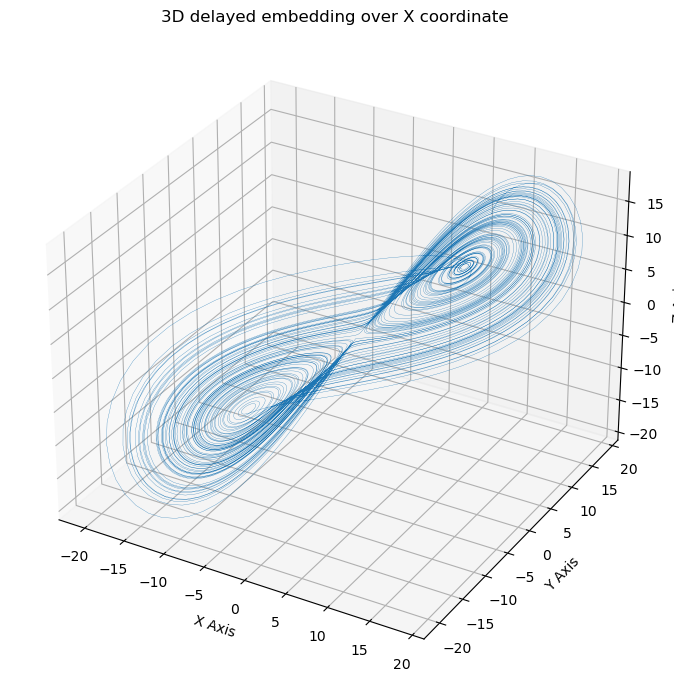

In [276]:
# Hint: Use method time_delay from utils.py
delta_t = 5
delayed_x = time_delay(xyzs,0, delta_t=delta_t,out_dim=3)

ax = plt.figure(figsize=(7,7)).add_subplot(projection='3d')
ax.plot(*delayed_x.T, lw=0.2)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("3D delayed embedding over X coordinate")
plt.savefig('../../plot/X_delayed_Lorenz.png')
plt.tight_layout()
plt.show()

### TODO: Create and visualize time-delayed z coordinates from Lorenz data in a 3-d Euclidean space


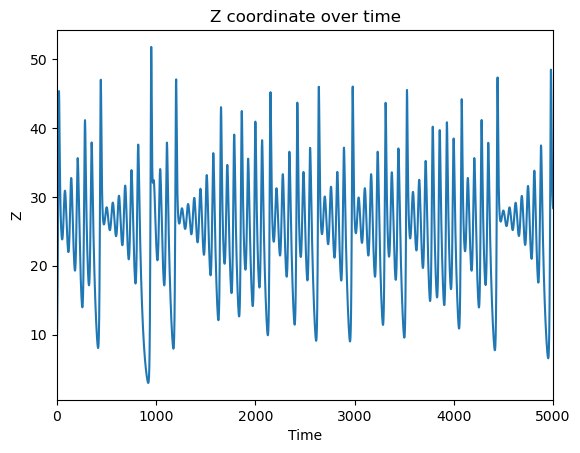

In [273]:
z = xyzs[:,2]
time = np.arange(len(z))
plt.plot(time,z)
plt.xlabel("Time")
plt.ylabel("Z")
plt.title("Z coordinate over time")
plt.xlim(0,5000)
plt.savefig('../../plot/Z_time_Lorenz.png')

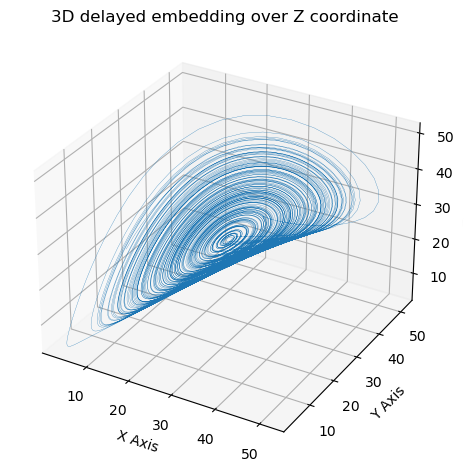

In [280]:
# Hint: Use method time_delay from utils.py
# Hint: Use method time_delay from utils.py
delayed_z = time_delay(xyzs,2, delta_t=delta_t,out_dim=3)

ax = plt.figure().add_subplot(projection='3d')
ax.plot(*delayed_z.T, lw=0.2)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("3D delayed embedding over Z coordinate")
plt.tight_layout()
plt.savefig('../../plot/Z_delayed_Lorenz.png')
plt.show()

Embedding with z coordinates does not work, indeed we are left with a single center circular structure instead of the characteristic butterfly shape of the original Lorenz attractor. Due to the limited variability and slower dynamics of the z-coordinate, the embedded plot might not capture the full complexity of the attractor, leading to a less accurate reconstruction compared to embedding using the
x or y coordinates.

### TODO: Bonus task
#### Approximating vector field

In [257]:
# computing vector field v, delta_t=1 in between 2 consecutive rows
delta_t = 2
v = np.diff(delayed_x, axis=0)/delta_t

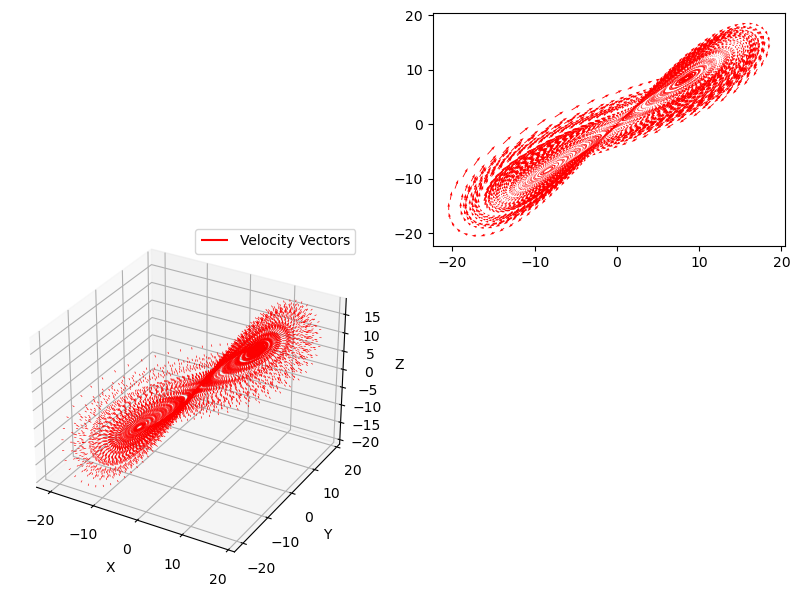

In [258]:
# Midpoints for vector plotting (optional)
midpoints = (delayed_x[:-1] + delayed_x[1:]) / 2

# Plotting the vector field
fig = plt.figure(figsize= (10,10))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 2], width_ratios=[1, 1])

ax = fig.add_subplot(gs[0:, 0], projection='3d',)
ax_2D = fig.add_subplot(gs[0,1])

# Original points
#ax.plot(delayed_x[:, 0], delayed_x[:, 1], delayed_x[:, 2], 'o-', label='Trajectory')

# Quiver plot for velocity vectors
ax.quiver(midpoints[:, 0], midpoints[:, 1], midpoints[:, 2],
          v[:, 0], v[:, 1], v[:, 2],
          length=0.1, normalize=True, color='r', label='Velocity Vectors')

ax_2D.quiver(midpoints[:, 0], midpoints[:, 1],
          v[:, 0], v[:, 1], color='r', label='Velocity Vectors')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

In [259]:
#SOLVING THE DIFFERENTIAL EQUATION

In [260]:
L = 300
#x = np.linspace(-4.5, 4.5, L)
centers = 42*np.random.random_sample((L,3)) -21

In [261]:
#phi = approx_non_linear_field(delayed_x[:len(v)],centers, 0.185)
#C =  least_squares(phi.T, v)
approx_field, C = non_linear_fit_transform(delayed_x[:len(v)],v, centers, 0.18)
def g(t, y, eps):
    y = y.reshape(-1,3)
    phi = approx_non_linear_field(y,centers, eps)
    #C =  least_squares(phi_.T, v)
    #return np.dot(phi_.T,C).flatten()
    return transform(phi,C).flatten()

mean_squared_error(v, approx_field)

5.689616201571112e-05

In [262]:
#delta_T = 0.01
T_end = 10000
t_eval =np.linspace (0, T_end , T_end)
SOL = solve_ivp(g, [0,T_end], delayed_x[:100].flatten(), t_eval= t_eval, args= (0.18,))
solutions = SOL.y.T

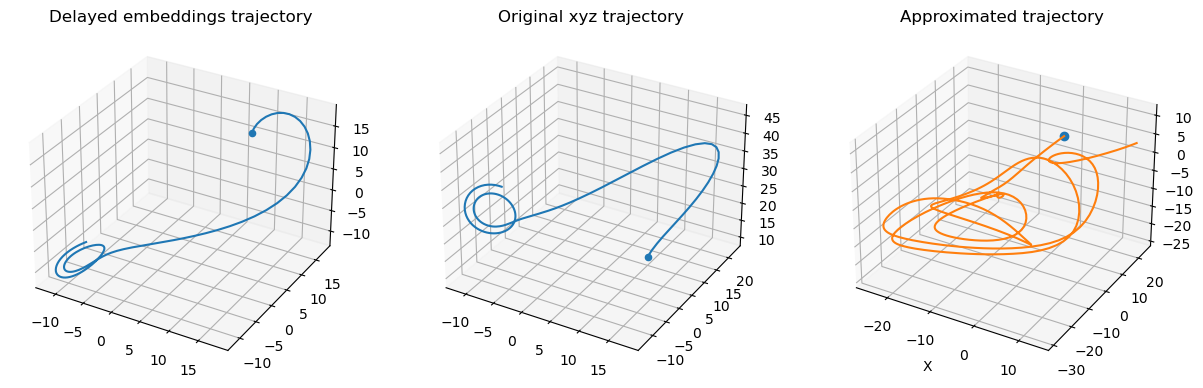

In [266]:
# Plotting trajectories
fig, ax = plt.subplots(1, 3, figsize=(15, 15), subplot_kw={'projection': '3d'})

ax[0].plot(*delayed_x[:150].T)
ax[0].scatter(*delayed_x[0])
ax[0].set_title("Delayed embeddings trajectory")
ax[1].plot(*xyzs[:150].T)
ax[1].scatter(*xyzs[0])
ax[1].set_title("Original xyz trajectory")
ax[2].plot(*solutions[0,67:70], marker= 'o')
ax[2].plot(*solutions[:500,67:70].T)
ax[2].set_title("Approximated trajectory")
#ax[0].set_xlabel('X')
#ax[0].set_ylabel('Y')
#ax[0].set_zlabel('Z')
plt.xlabel('X')
plt.show()